In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('placement.csv')
df.sample(5)

,Unnamed: 0,cgpa,iq,placement
69,69,8.5,120.0,1
16,16,5.2,224.0,0
11,11,6.9,138.0,1
82,82,6.5,37.0,1
71,71,6.1,132.0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [4]:
df['placement'].value_counts()

placement
1    50
0    50
Name: count, dtype: int64

In [6]:
df = df.iloc[:,1:]
df.head(3)

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0


In [8]:
import matplotlib.pyplot as plt

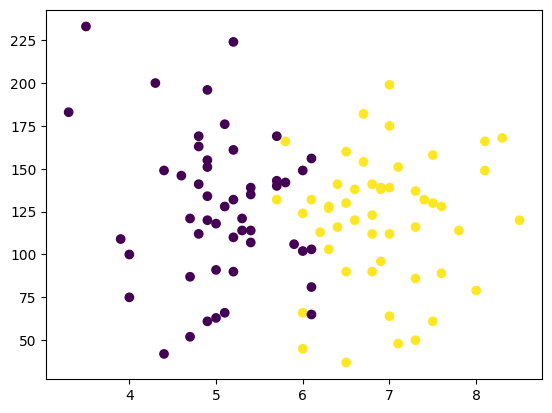

In [12]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [13]:
X = df.iloc[:, 0:2]
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [14]:
y = df.iloc[:, 2]
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [15]:
y = df.iloc[:, -1]
y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [17]:
X_train.head()

,cgpa,iq
55,7.8,114.0
88,4.4,149.0
26,7.0,199.0
42,7.6,89.0
69,8.5,120.0


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
X_train_trf = scaler.fit_transform(X_train)

In [20]:
X_train_trf

array([[ 1.64027754, -0.29911792],
       [-1.44090679,  0.59472432],
       [ 0.91529299,  1.87164179],
       [ 1.4590314 , -0.93757666],
       [ 2.27463902, -0.14588782],
       [-0.80654531,  1.28425975],
       [-0.98779145,  0.21164907],
       [-1.44090679, -2.13787909],
       [-0.80654531, -1.5249587 ],
       [ 1.1871622 , -0.24804122],
       [ 0.82466992,  0.31380247],
       [-0.71592224,  0.90118451],
       [-0.17218383,  1.02887626],
       [-0.71592224, -0.91203831],
       [ 0.73404686, -0.35019462],
       [ 1.00591606, -1.98464899],
       [ 0.82466992, -0.75880821],
       [ 1.91214675,  1.02887626],
       [ 0.73404686, -0.91203831],
       [-0.71592224,  2.51010053],
       [-0.5346761 ,  0.23718742],
       [-1.07841452,  0.95226121],
       [-0.89716838, -1.60157375],
       [-1.53152986,  1.89718014],
       [ 0.00906231, -0.04373442],
       [-0.71592224,  0.16057237],
       [-0.5346761 , -0.47788637],
       [-0.89716838, -0.88649996],
       [ 0.00906231,

In [21]:
X_test_trf = scaler.transform(X_test)
X_test_trf

array([[ 1.36840833,  0.10949567],
       [ 2.09339288,  1.07995296],
       [ 0.28093151,  0.03288063],
       [ 0.00906231, -1.5249587 ],
       [ 1.36840833, -1.65265045],
       [-1.25966065,  0.51810927],
       [-0.98779145, -0.14588782],
       [-0.98779145,  1.79502675],
       [ 0.00906231, -2.06126404],
       [ 0.73404686, -0.06927277],
       [-1.80339906, -0.65665481],
       [ 1.4590314 ,  0.05841897],
       [-0.98779145, -1.65265045],
       [ 0.00906231,  0.59472432],
       [ 1.1871622 , -1.01419171],
       [-0.17218383,  0.41595587],
       [-0.98779145,  0.74795441],
       [ 1.1871622 , -1.93357229],
       [-0.5346761 ,  0.33934082],
       [-1.89402213, -0.42680967]])

In [22]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [23]:
## model traning
my_model = clf.fit(X_train_trf, y_train)
my_model


LogisticRegression()

In [27]:
y_pred = my_model.predict(X_test_trf)
y_pred

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0],
      dtype=int64)

In [25]:
y_test

83    1
53    1
70    1
45    1
44    1
39    0
22    0
80    0
10    1
0     1
18    0
30    1
73    0
33    0
90    1
4     0
76    0
77    1
12    0
31    0
Name: placement, dtype: int64

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.85

## Ploting The model dicision boundary

In [29]:
from mlxtend.plotting import plot_decision_regions


<Axes: >

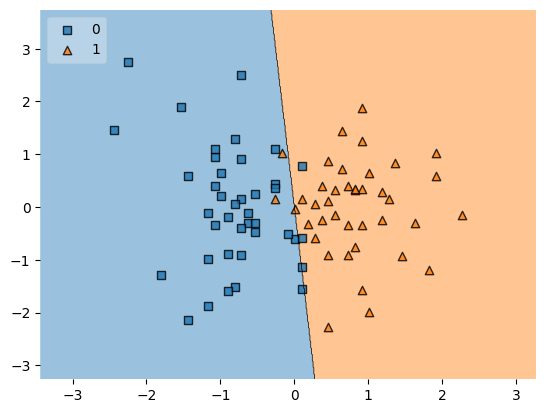

In [30]:
plot_decision_regions(X_train_trf, y_train.values, clf=my_model, legend=2)


## Download this model

In [31]:
import pickle
pickle.dump(my_model, open('my_model.pkl', 'wb'))

## Deploy this model using steamlit apps